# Day 1: Classification

This day will serve as an introduction to machine learning. We recall some fundamental concepts about decision theory and classification. We also present some widely used models and algorithms and try to provide
the main motivation behind them. There are several textbooks that provide a thorough description of some
of the concepts introduced here: for example, Mitchell (1997), Duda et al. (2001), Schölkopf and Smola (2002),
Joachims (2002), Bishop (2006), Manning et al. (2008), to name just a few. The concepts that we introduce in this
chapter will be revisited in later chapters, where the same algorithms and models will be adapted to structured
inputs and outputs. For now, we concern only with multi-class classification (with just a few classes).






| Exercise | Requires coding | What to code (if anything) | What should you learn (or practice)    | Done it! |
|----------|-----------------|----------------------------|----------------------------------------|----------|
| 1.1      | Yes             | Naive Bayes                | Naive Bayes                            | No       |
| 1.2      | No              |                            | Perceptron                             | No       |
| 1.3      | No              |                            | MIRA                                   | No       |
| 1.4      | No              |                            | Maximum Entropy                        | No       |
| 1.5      | Yes             | SVM                        | SVM                                    | No       |
| 1.6      | No              |                            | Impact of Amount of data in the models | No       |


# Generative classifiers



In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt

In [2]:
import sys
# We will this append to ensure we can import lxmls toolkit
sys.path.append('../lxmls-toolkit')

In [3]:
import lxmls.readers.sentiment_reader as srs
import lxmls.classifiers.naive_bayes as nb

## Exercise 1.1 

In this exercise we will use the Amazon sentiment analysis data (Blitzer et al., 2007), where the goal is to
classify text documents as expressing a positive or negative sentiment (i.e., a classification problem with two classes). We are going to focus on book reviews. To load the data, type:

In [4]:
scr = srs.SentimentCorpus("books")

2000
1600


In [5]:
len(scr.feat_dict)

13989

In [6]:
scr.train_X.shape, scr.train_y.shape

((1600, 13989), (1600, 1))

In [7]:
scr.test_X.shape,  scr.test_y.shape

((400, 13989), (400, 1))

This will load the data in a bag-of-words representation where rare words (occurring less than 5 times in the training data) are removed.

####  Part 1
<font color='red'>**Implement the Naıve Bayes algorithm.**</font> Open the file `multinomial naive bayes.py`, which is inside the classifiers folder. In the `MultinomialNaiveBayes` class you will find the train method. We have already placed some code in that file to help you get started.

#### Part 2
After implementing, run NaıveBayes with the multinomial model on the Amazon dataset(sentiment classification) and report results both for training and testing:

In [8]:
import lxmls.classifiers.multinomial_naive_bayes as mnbb
mnb = mnbb.MultinomialNaiveBayes()

params_nb_sc = mnb.train(scr.train_X,scr.train_y)

y_pred_train = mnb.test(scr.train_X,params_nb_sc)
acc_train = mnb.evaluate(scr.train_y, y_pred_train)

y_pred_test = mnb.test(scr.test_X,params_nb_sc)
acc_test = mnb.evaluate(scr.test_y, y_pred_test)

print("Multinomial Naive Bayes Amazon Sentiment Accuracy train: {} test: {}".format(acc_train, acc_test))

Multinomial Naive Bayes Amazon Sentiment Accuracy train: 0.9875 test: 0.635


../lxmls-toolkit/lxmls/classifiers/multinomial_naive_bayes.py:62: RuntimeWarning: divide by zero encountered in log
  params[1:, i] = np.nan_to_num(np.log(likelihood[:, i]))


##### Part 3
Observe that words that were not observed at training time cause problems at test time. Why? To solve this problem, apply a simple add-one smoothing technique: replace the expression in Eq. 1.9 for the estimation of the conditional probabilities by 

$$ \hat{P}(w_j \,|\, c_k) = \frac{1+\sum_{m \in \mathcal{I}_k} n_j (x^m)}{J + \sum_{i=1}^J \sum_{m \in \mathcal{I}_k} n_i(x^m)} $$

where:

- $J$ is the number of word types (the size of the vocabulary) 
- $\mathcal{I}_k$ are the indices of those training instances (documents) belonging to the k'th class
- $n_j(x^m)$ is the number of occurences of word $w_j$ in document $x^m$.


This is a widely used smoothing strategy which has a Bayesian interpretation: it corresponds to choosing a uniform
prior for the word distribution on both classes, and to replace the maximum likelihood criterion by a maximum a
posteriori approach. This is a form of regularization, preventing the model from overfitting on the training data.
See e.g. Manning and Schütze (1999); Manning et al. (2008) for more information. 

Report the new accuracies:

In [9]:
# Report here the accuracies with add-one smoothing.
# ...

# Discriminative Classifiers

In the previous sections we discussed generative classifiers, which require us to model the class prior and class
conditional distributions ($P ( Y )$ and $P ( X | Y )$, respectively). Recall, however, that a classifier is any function
which maps objects $x \in X$ onto classes $y \in Y$. While it's often useful to model how the data was generated, it’s
not required. Classifiers that do not model these distributions are called discriminative classifiers.

## Exercise 1.2



In [10]:
import lxmls.readers.simple_data_set as sds
sd = sds.SimpleDataSet(nr_examples=100, g1 = [[-1,-1],1], g2 = [[1,1],1],
                       balance=0.5,split=[0.5,0,0.5])

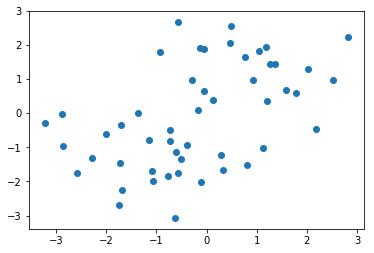

In [11]:
plt.scatter(sd.train_X[:,0],sd.train_X[:,1])

### 1.2.2

Run the perceptron algorithm on the simple dataset previously generated and report its train and test set accuracy:

In [12]:
import lxmls.classifiers.perceptron as percc
perc = percc.Perceptron()

In [13]:
params_perc_sd = perc.train(sd.train_X, sd.train_y)
y_pred_train = perc.test(sd.train_X,params_perc_sd)
acc_train = perc.evaluate(sd.train_y, y_pred_train)
y_pred_test = perc.test(sd.test_X,params_perc_sd)
acc_test = perc.evaluate(sd.test_y, y_pred_test)
print("Perceptron Simple Dataset Accuracy train: {} test: {}".format(acc_train, acc_test))

Rounds: 0 Accuracy: 0.940000
Rounds: 1 Accuracy: 0.980000
Rounds: 2 Accuracy: 0.980000
Rounds: 3 Accuracy: 0.940000
Rounds: 4 Accuracy: 0.980000
Rounds: 5 Accuracy: 0.980000
Rounds: 6 Accuracy: 0.960000
Rounds: 7 Accuracy: 0.980000
Rounds: 8 Accuracy: 0.960000
Rounds: 9 Accuracy: 0.980000
Perceptron Simple Dataset Accuracy train: 0.96 test: 0.92


### 1.2.3

Plot the decision boundary foun.

Change the code to save the intermediate weight vectors, and plot them every five iterations. What do you observe?

[[-1.69314718 -1.69314718]
 [-1.          1.        ]
 [-1.          1.        ]]


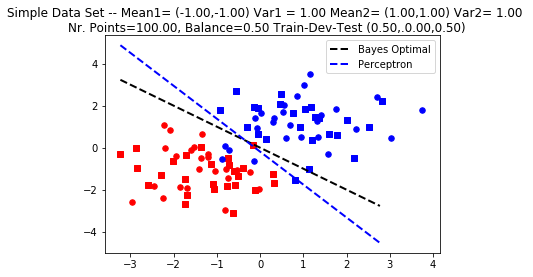

In [14]:
fig,axis = sd.plot_data()
fig,axis = sd.add_line(fig,axis,params_perc_sd,"Perceptron","blue")

### 1.2.4

Run the perceptron algorithm on the Amazon dataset.

In [15]:
perc = percc.Perceptron()

params_nb_sc = perc.train(scr.train_X,scr.train_y)
y_pred_train = perc.test(scr.train_X,params_nb_sc)
acc_train = perc.evaluate(scr.train_y, y_pred_train)
y_pred_test = perc.test(scr.test_X,params_nb_sc)
acc_test = perc.evaluate(scr.test_y, y_pred_test)

print("Perceptron Amazon Sentiment Accuracy train: {} test: {}".format(acc_train, acc_test))

Rounds: 0 Accuracy: 0.870000
Rounds: 1 Accuracy: 0.940000
Rounds: 2 Accuracy: 0.979375
Rounds: 3 Accuracy: 0.965625
Rounds: 4 Accuracy: 0.989375
Rounds: 5 Accuracy: 0.996250
Rounds: 6 Accuracy: 0.995000
Rounds: 7 Accuracy: 0.999375
Rounds: 8 Accuracy: 0.996250
Rounds: 9 Accuracy: 0.998125
Perceptron Amazon Sentiment Accuracy train: 0.99875 test: 0.825


## Exercise 1.3
We provide an implementation of the MIRA algorithm.
Compare it with the perceptron for various values of λ


In [16]:
import lxmls.classifiers.mira as mirac

train_X = sd.train_X
train_y = sd.train_y
test_X  = sd.test_X
test_y  = sd.test_y

reg = 0.1

mira = mirac.Mira()
mira.regularizer = reg 
    
    
# train the model
print("\tTraining model with Lambda: %f"%(reg))
params_mira_sc = mira.train(train_X, train_y)

# evaluate train
y_pred_train = mira.test(train_X, params_mira_sc)
acc_train = mira.evaluate(train_y, y_pred_train)

# evaluate test
y_pred_test = mira.test(test_X, params_mira_sc)
acc_test = mira.evaluate(test_y, y_pred_test)

# Print results
print("\tMira Amazon Sentiment Accuracy train: %f test: %f\n\n"%(acc_train,acc_test))

	Training model with Lambda: 0.100000
Rounds: 0 Accuracy: 0.960000
Rounds: 1 Accuracy: 0.980000
Rounds: 2 Accuracy: 0.960000
Rounds: 3 Accuracy: 1.000000
Rounds: 4 Accuracy: 1.000000
Rounds: 5 Accuracy: 1.000000
Rounds: 6 Accuracy: 1.000000
Rounds: 7 Accuracy: 1.000000
Rounds: 8 Accuracy: 1.000000
Rounds: 9 Accuracy: 1.000000
	Mira Amazon Sentiment Accuracy train: 0.980000 test: 0.920000





In [20]:
import lxmls.classifiers.mira as mirac

train_X = sd.train_X
train_y = sd.train_y
test_X  = sd.test_X
test_y  = sd.test_y

regularizers = [0.1, 0.2, 0.3, 0.5, 1.]

for reg in regularizers:
    mira = mirac.Mira()
    mira.regularizer = reg 
    
    
    # train the model
    print("\tTraining model with Lambda: %f"%(reg))
    params_mira_sc = mira.train(train_X, train_y)
    
    # evaluate train
    y_pred_train = mira.test(train_X, params_mira_sc)
    acc_train = mira.evaluate(train_y, y_pred_train)
    
    # evaluate test
    y_pred_test = mira.test(test_X, params_mira_sc)
    acc_test = mira.evaluate(test_y, y_pred_test)
    
    # Print results
    print("\tMira Amazon Sentiment Accuracy train: %f test: %f\n\n"%(acc_train,acc_test))


	Training model with Lambda: 0.100000
Rounds: 0 Accuracy: 0.960000
Rounds: 1 Accuracy: 0.980000
Rounds: 2 Accuracy: 0.960000
Rounds: 3 Accuracy: 1.000000
Rounds: 4 Accuracy: 1.000000
Rounds: 5 Accuracy: 1.000000
Rounds: 6 Accuracy: 1.000000
Rounds: 7 Accuracy: 1.000000
Rounds: 8 Accuracy: 1.000000
Rounds: 9 Accuracy: 1.000000
	Mira Amazon Sentiment Accuracy train: 0.980000 test: 0.920000



	Training model with Lambda: 0.200000
Rounds: 0 Accuracy: 0.960000
Rounds: 1 Accuracy: 0.980000
Rounds: 2 Accuracy: 0.940000
Rounds: 3 Accuracy: 0.980000
Rounds: 4 Accuracy: 0.980000
Rounds: 5 Accuracy: 0.980000
Rounds: 6 Accuracy: 0.980000
Rounds: 7 Accuracy: 0.980000
Rounds: 8 Accuracy: 0.980000
Rounds: 9 Accuracy: 0.980000
	Mira Amazon Sentiment Accuracy train: 0.980000 test: 0.920000



	Training model with Lambda: 0.300000
Rounds: 0 Accuracy: 0.960000
Rounds: 1 Accuracy: 0.980000
Rounds: 2 Accuracy: 0.980000
Rounds: 3 Accuracy: 0.980000
Rounds: 4 Accuracy: 0.980000
Rounds: 5 Accuracy: 0.980000


Now in the Amazon dataset

In [19]:
train_X.shape

(50, 2)

In [21]:
import lxmls.classifiers.mira as mirac

X_train = scr.train_X
y_train = scr.train_y
X_test  = scr.test_X
y_test  = scr.test_y

regularizers = [0.1, 0.2, 0.3, 0.5, 1.]


for reg in regularizers:
    mira = mirac.Mira()
    mira.regularizer = reg 
    
    # train the model
    print("\tTraining model with Lambda: {}".format(reg)) 
    params_mira_sc = mira.train(scr.train_X, scr.train_y)
    
    # evaluate train
    y_pred_train = mira.test(scr.train_X, params_mira_sc)
    acc_train = mira.evaluate(scr.train_y, y_pred_train)
    
    # evaluate test
    y_pred_test = mira.test(scr.test_X,params_mira_sc)
    acc_test = mira.evaluate(scr.test_y, y_pred_test)
    
    # Print results
    print("Mira Amazon Sentiment Accuracy train: {} test: {}\n\n".format(acc_train, acc_test))

	Training model with Lambda: 0.100000
Rounds: 0 Accuracy: 0.707500
Rounds: 1 Accuracy: 0.740625
Rounds: 2 Accuracy: 0.743125
Rounds: 3 Accuracy: 0.811875
Rounds: 4 Accuracy: 0.770000
Rounds: 5 Accuracy: 0.810625
Rounds: 6 Accuracy: 0.843750
Rounds: 7 Accuracy: 0.868750
Rounds: 8 Accuracy: 0.890000
Rounds: 9 Accuracy: 0.868125
Mira Amazon Sentiment Accuracy train: 0.886875 test: 0.755000



	Training model with Lambda: 0.200000
Rounds: 0 Accuracy: 0.597500
Rounds: 1 Accuracy: 0.658125
Rounds: 2 Accuracy: 0.715625
Rounds: 3 Accuracy: 0.749375
Rounds: 4 Accuracy: 0.696875
Rounds: 5 Accuracy: 0.764375
Rounds: 6 Accuracy: 0.808750
Rounds: 7 Accuracy: 0.802500
Rounds: 8 Accuracy: 0.796875
Rounds: 9 Accuracy: 0.815625
Mira Amazon Sentiment Accuracy train: 0.818125 test: 0.737500



	Training model with Lambda: 0.300000
Rounds: 0 Accuracy: 0.594375
Rounds: 1 Accuracy: 0.581875
Rounds: 2 Accuracy: 0.670625
Rounds: 3 Accuracy: 0.685000
Rounds: 4 Accuracy: 0.744375
Rounds: 5 Accuracy: 0.750000
Ro

## Exercise 1.4 

We provide an implementation of the L-BFGS algorithm for training maximum entropy models in the class
MaxEnt batch, as well as an implementation of the SGD algorithm in the class MaxEnt online.

### 1.4.1
Train a maximum entropy model using L-BFGS on the Simple data set (try different values of $\lambda$). Compare the
results with the previous methods. Plot the decision boundary.

In [24]:
import lxmls.classifiers.max_ent_batch as mebc
me_lbfgs = mebc.MaxEntBatch()
me_lbfgs.regularizer = 1.0
params_meb_sd = me_lbfgs.train(sd.train_X,sd.train_y)
y_pred_train = me_lbfgs.test(sd.train_X,params_meb_sd)
acc_train = me_lbfgs.evaluate(sd.train_y, y_pred_train)
y_pred_test = me_lbfgs.test(sd.test_X,params_meb_sd)
acc_test = me_lbfgs.evaluate(sd.test_y, y_pred_test)

print("Max-Ent batch Simple Dataset Accuracy train: {} test: {}".format(acc_train, acc_test))
fig,axis = sd.add_line(fig,axis,params_meb_sd,"Max-Ent-Batch","orange")

Objective = 0.69314718056
Objective = 0.669472977105
Objective = 0.445355190237
Objective = 0.43644282509
Objective = 0.435925031227
Objective = 0.43592379509
Objective = 0.435923779651
Objective = 0.435923778621
Max-Ent batch Simple Dataset Accuracy train: 0.98 test: 0.92


### 1.4.2

Train a maximum entropy model using L-BFGS, on the Amazon dataset (try different values of λ) and report training and test set accuracy. What do you observe?

In [25]:
params_meb_sc = me_lbfgs.train(scr.train_X,scr.train_y)
y_pred_train = me_lbfgs.test(scr.train_X,params_meb_sc)
acc_train = me_lbfgs.evaluate(scr.train_y, y_pred_train)
y_pred_test = me_lbfgs.test(scr.test_X,params_meb_sc)
acc_test = me_lbfgs.evaluate(scr.test_y, y_pred_test)
print("Max-Ent batch Amazon Sentiment Accuracy train: {} test: {}".format(acc_train, acc_test))

Objective = 0.69314718056
Objective = 2.35699359188
Objective = 0.684446278348
Objective = 0.662465339727
Objective = 0.636905088298
Objective = 0.627955556207
Objective = 0.62428542661
Objective = 0.622621016561
Objective = 0.622511818322
Objective = 0.622432543872
Objective = 0.622409822693
Objective = 0.622403500619
Objective = 0.622402924504
Objective = 0.622402796132
Objective = 0.622402787594
Objective = 0.622402780959
Objective = 0.622402796062
Objective = 0.622402779848
Max-Ent batch Amazon Sentiment Accuracy train: 0.858125 test: 0.79


### 1.4.3

Now, fix $\lambda = 1.0$ and train with SGD (you might try to adjust the initial step). Compare the objective values
obtained during training with those obtained with L-BFGS. What do you observe?

In [26]:
import lxmls.classifiers.max_ent_online as meoc
me_sgd = meoc.MaxEntOnline()
me_sgd.regularizer = 1.0
params_meo_sc = me_sgd.train(scr.train_X,scr.train_y)
y_pred_train = me_sgd.test(scr.train_X,params_meo_sc)
acc_train = me_sgd.evaluate(scr.train_y, y_pred_train)
y_pred_test = me_sgd.test(scr.test_X,params_meo_sc)
acc_test = me_sgd.evaluate(scr.test_y, y_pred_test)
print("Max-Ent Online Amazon Sentiment Accuracy train: {} test: {}".format(acc_train, acc_test))

Epochs: 0 Objective: 1.169629
Epochs: 0 Accuracy: 0.821875
Epochs: 1 Objective: 0.646076
Epochs: 1 Accuracy: 0.850000
Epochs: 2 Objective: 0.635095
Epochs: 2 Accuracy: 0.861250
Epochs: 3 Objective: 0.631180
Epochs: 3 Accuracy: 0.860000
Epochs: 4 Objective: 0.629128
Epochs: 4 Accuracy: 0.861875
Epochs: 5 Objective: 0.627862
Epochs: 5 Accuracy: 0.861250
Epochs: 6 Objective: 0.627001
Epochs: 6 Accuracy: 0.861250
Epochs: 7 Objective: 0.626376
Epochs: 7 Accuracy: 0.860625
Epochs: 8 Objective: 0.625902
Epochs: 8 Accuracy: 0.860625
Epochs: 9 Objective: 0.625529
Epochs: 9 Accuracy: 0.860625
Max-Ent Online Amazon Sentiment Accuracy train: 0.860625 test: 0.7875


## Exercise 1.5

Implement the SVM primal algorithm (Hint: look at the models implemented earlier, you should only need to change a few lines of code). Do this by creating a file SVM.py and implement class SVM. Then, repeat the MaxEnt exercise now using SVMs, for several values of λ:

In [27]:
import lxmls.classifiers.svm as svmc
svm = svmc.SVM()
svm.regularizer = 1.0 # This is lambda
params_svm_sd = svm.train(sd.train_X,sd.train_y)
y_pred_train = svm.test(sd.train_X,params_svm_sd)
acc_train = svm.evaluate(sd.train_y, y_pred_train)
y_pred_test = svm.test(sd.test_X,params_svm_sd)
acc_test = svm.evaluate(sd.test_y, y_pred_test)
print("SVM Online Simple Dataset Accuracy train: {} test: {}".format(acc_train, acc_test))

Epochs: 0 Objective: 0.512516
Epochs: 0 Accuracy: 0.960000
Epochs: 1 Objective: 0.315841
Epochs: 1 Accuracy: 0.980000
Epochs: 2 Objective: 0.307208
Epochs: 2 Accuracy: 0.980000
Epochs: 3 Objective: 0.308697
Epochs: 3 Accuracy: 0.960000
Epochs: 4 Objective: 0.306734
Epochs: 4 Accuracy: 0.960000
Epochs: 5 Objective: 0.304654
Epochs: 5 Accuracy: 0.960000
Epochs: 6 Objective: 0.305010
Epochs: 6 Accuracy: 0.960000
Epochs: 7 Objective: 0.304378
Epochs: 7 Accuracy: 0.960000
Epochs: 8 Objective: 0.303285
Epochs: 8 Accuracy: 0.960000
Epochs: 9 Objective: 0.303708
Epochs: 9 Accuracy: 0.960000
SVM Online Simple Dataset Accuracy train: 0.96 test: 0.92


In [28]:
fig, axis = sd.add_line(fig,axis,params_svm_sd,"SVM","orange")

In [29]:
params_svm_sc = svm.train(scr.train_X,scr.train_y)
y_pred_train = svm.test(scr.train_X,params_svm_sc)
acc_train = svm.evaluate(scr.train_y, y_pred_train)
y_pred_test = svm.test(scr.test_X,params_svm_sc)
acc_test = svm.evaluate(scr.test_y, y_pred_test)

Epochs: 0 Objective: 1.360800
Epochs: 0 Accuracy: 0.856875
Epochs: 1 Objective: 0.804841
Epochs: 1 Accuracy: 0.873125
Epochs: 2 Objective: 0.766829
Epochs: 2 Accuracy: 0.880625
Epochs: 3 Objective: 0.750697
Epochs: 3 Accuracy: 0.883125
Epochs: 4 Objective: 0.742333
Epochs: 4 Accuracy: 0.880000
Epochs: 5 Objective: 0.737431
Epochs: 5 Accuracy: 0.878750
Epochs: 6 Objective: 0.734310
Epochs: 6 Accuracy: 0.876875
Epochs: 7 Objective: 0.731908
Epochs: 7 Accuracy: 0.873750
Epochs: 8 Objective: 0.729589
Epochs: 8 Accuracy: 0.875000
Epochs: 9 Objective: 0.728323
Epochs: 9 Accuracy: 0.878125


In [30]:
print("SVM Online Amazon Sentiment Accuracy train: {} test: {}".format(acc_train, acc_test))

SVM Online Amazon Sentiment Accuracy train: 0.878125 test: 0.8025


## Exercise 1.6

Using the simple dataset run the different algorithms varying some characteristics of the data: like the number of points, variance (hence separability), class balance. Use function `run_all_classifiers` in file `labs/run_all_classifiers.py` which receives a dataset and plots all decisions boundaries and accuracies. What can you say about the methods when the amount of data increases? What about when the classes become too unbalanced?
